# L2 and L1 regularization for linear estimators

In [112]:
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()

/home/tomasz/anaconda3/envs/tomaszwojcicki/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

In [113]:
print(boston.keys())
print(boston.data.shape)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
(506, 13)


In [114]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [115]:
import numpy as np
import pandas as pd

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['PRICE'])
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Ex. 1.

In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
print(X.shape[0])
print(float(X_train.shape[0]) / float(X.shape[0]))
print(float(X_test.shape[0]) / float(X.shape[0]))

506
0.7984189723320159
0.2015810276679842


In [118]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

std_X_train = std_scaler.fit_transform(X_train)

std_X_test = std_scaler.transform(X_test)

### Ex. 2.

In [119]:
from sklearn.linear_model import LinearRegression

lin_regr = LinearRegression()

lin_regr.fit(std_X_train, y_train)

y_pred = lin_regr.predict(std_X_test)

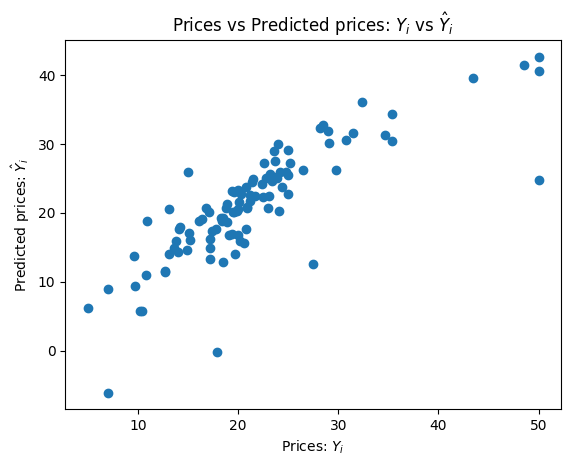

In [120]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

### Ex. 3.

In [121]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

24.291119474973513

### Ex. 4.

In [122]:
lin_regr.score(std_X_test, y_test)

0.668759493535632

In [123]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree=2)

poly_X_train = polynomial_features.fit_transform(std_X_train)
poly_X_test = polynomial_features.transform(std_X_test)

# Lasso model

/home/tomasz/anaconda3/envs/tomaszwojcicki/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.333e+01, tolerance: 3.510e+00
  model = cd_fast.enet_coordinate_descent(


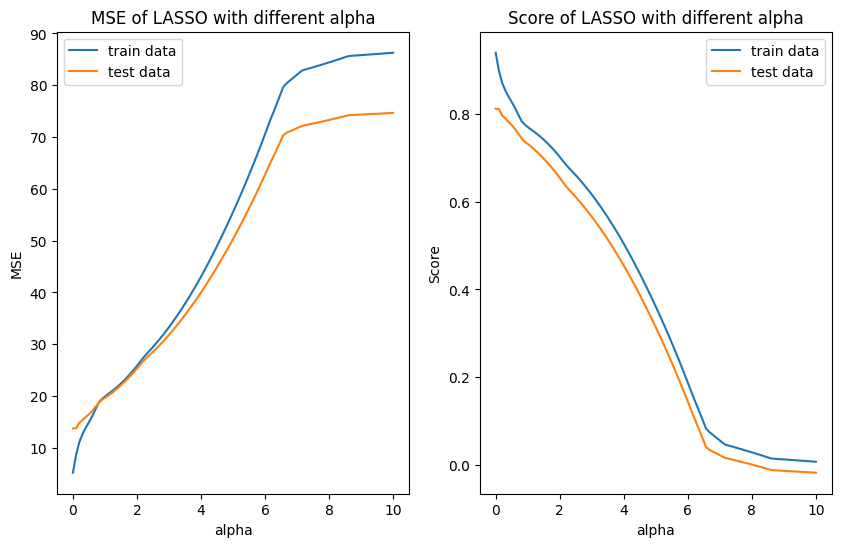

In [124]:
from sklearn.linear_model import Lasso

alpha_list = np.linspace(0.001, 10, 100, endpoint=True)
MSE_train = np.array([])
score_train = np.array([])
MSE_test = np.array([])
score_test = np.array([])


for alpha in alpha_list:
    # lasso model
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(poly_X_train, y_train)

    y_pred_train = lasso.predict(poly_X_train)
    y_pred_test = lasso.predict(poly_X_test)

    MSE_train = np.append(MSE_train, mean_squared_error(y_train, y_pred_train))
    MSE_test  = np.append(MSE_test, mean_squared_error(y_test, y_pred_test))

    score_train = np.append(score_train, lasso.score(poly_X_train, y_train))
    score_test  = np.append(score_test,  lasso.score(poly_X_test, y_test))

fig, axes = plt.subplots(1, 2, figsize=(10, 6))
axes[0].plot(alpha_list, MSE_train, label='train data')
axes[0].plot(alpha_list, MSE_test, label='test data')
axes[0].set_title('MSE of LASSO with different alpha')
axes[0].set_xlabel('alpha')
axes[0].set_ylabel('MSE')
axes[0].legend()

axes[1].plot(alpha_list, score_train, label='train data')
axes[1].plot(alpha_list, score_test, label='test data')
axes[1].set_title('Score of LASSO with different alpha')
axes[1].set_xlabel('alpha')
axes[1].set_ylabel('Score')
axes[1].legend()

plt.show()

# Ridge model

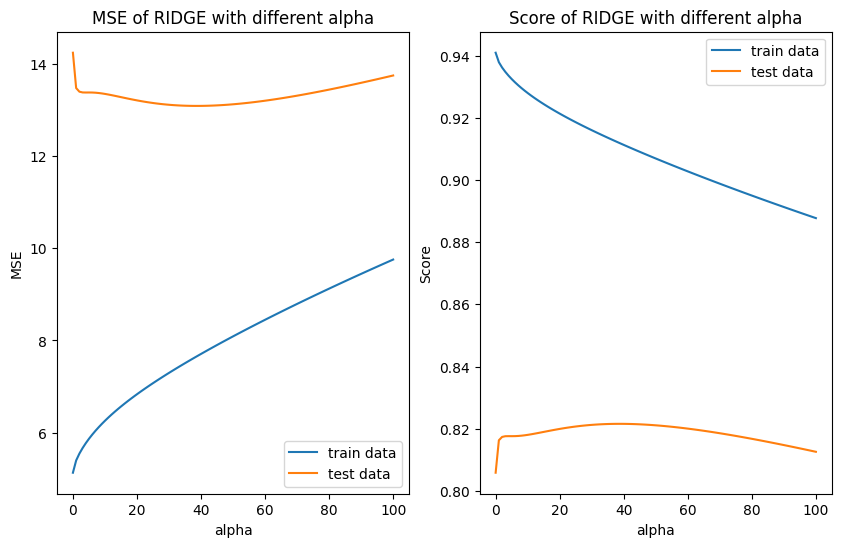

In [125]:
from sklearn.linear_model import Ridge

alpha_list = np.linspace(0.001, 100, 100, endpoint=True)
MSE_train = np.array([])
score_train = np.array([])
MSE_test = np.array([])
score_test = np.array([])


for alpha in alpha_list:
    # lasso model
    ridge = Ridge(alpha=alpha, max_iter=10000)
    ridge.fit(poly_X_train, y_train)

    y_pred_train = ridge.predict(poly_X_train)
    y_pred_test = ridge.predict(poly_X_test)

    MSE_train = np.append(MSE_train, mean_squared_error(y_train, y_pred_train))
    MSE_test  = np.append(MSE_test, mean_squared_error(y_test, y_pred_test))

    score_train = np.append(score_train, ridge.score(poly_X_train, y_train))
    score_test  = np.append(score_test,  ridge.score(poly_X_test, y_test))

fig, axes = plt.subplots(1, 2, figsize=(10, 6))
axes[0].plot(alpha_list, MSE_train, label='train data')
axes[0].plot(alpha_list, MSE_test, label='test data')
axes[0].set_title('MSE of RIDGE with different alpha')
axes[0].set_xlabel('alpha')
axes[0].set_ylabel('MSE')
axes[0].legend()

axes[1].plot(alpha_list, score_train, label='train data')
axes[1].plot(alpha_list, score_test, label='test data')
axes[1].set_title('Score of RIDGE with different alpha')
axes[1].set_xlabel('alpha')
axes[1].set_ylabel('Score')
axes[1].legend()

plt.show()

# Regularization for logistic regression

### Dataset A

In [126]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

df = pd.DataFrame(data.data)
df.columns = data.feature_names
y = data.target

### Ex. 1.

In [127]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

std_scaler = StandardScaler()

std_X_train = std_scaler.fit_transform(X_train)

std_X_test = std_scaler.transform(X_test)

poly_X_train = polynomial_features.fit_transform(std_X_train)
poly_X_test = polynomial_features.transform(std_X_test)

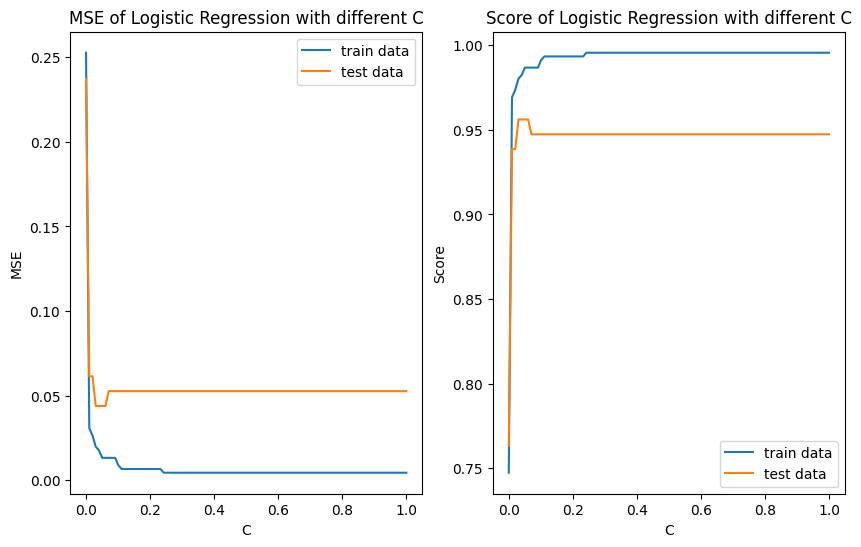

In [128]:
from sklearn.linear_model import LogisticRegression

C_list = np.linspace(0.0001, 1, 100, endpoint=True)
MSE_train = np.array([])
score_train = np.array([])
MSE_test = np.array([])
score_test = np.array([])


for C in C_list:
    # lasso model
    log_regr = LogisticRegression(C=C, max_iter=10000)
    log_regr.fit(poly_X_train, y_train)

    y_pred_train = log_regr.predict(poly_X_train)
    y_pred_test = log_regr.predict(poly_X_test)

    MSE_train = np.append(MSE_train, mean_squared_error(y_train, y_pred_train))
    MSE_test  = np.append(MSE_test, mean_squared_error(y_test, y_pred_test))

    score_train = np.append(score_train, log_regr.score(poly_X_train, y_train))
    score_test  = np.append(score_test,  log_regr.score(poly_X_test, y_test))

fig, axes = plt.subplots(1, 2, figsize=(10, 6))
axes[0].plot(C_list, MSE_train, label='train data')
axes[0].plot(C_list, MSE_test, label='test data')
axes[0].set_title('MSE of Logistic Regression with different C')
axes[0].set_xlabel('C')
axes[0].set_ylabel('MSE')
axes[0].legend()

axes[1].plot(C_list, score_train, label='train data')
axes[1].plot(C_list, score_test, label='test data')
axes[1].set_title('Score of Logistic Regression with different C')
axes[1].set_xlabel('C')
axes[1].set_ylabel('Score')
axes[1].legend()

plt.show()

### Dataset B

In [129]:
path = 'https://uu-sml.github.io/course-sml-public/data/biopsy.csv'
dataset = pd.read_csv(path, na_values='?', dtype={'ID': str})
columns = ['ID',
           'Clump Thickness',
           'Uniformity of Cell Size',
           'Uniformity of Cell Shape',
           'Marginal Adhesion',
           'Single Epithelial Cell Size',
           'Bare Nuclei',
           'Bland Chromatin',
           'Normal Nucleoli',
           'Mitoses',
           'Class']

dataset.columns = columns

dataset.head()

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,benign
1,1002945,5,4,4,5,7,10.0,3,2,1,benign
2,1015425,3,1,1,1,2,2.0,3,1,1,benign
3,1016277,6,8,8,1,3,4.0,3,7,1,benign
4,1017023,4,1,1,3,2,1.0,3,1,1,benign


In [130]:
dataset.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
count,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [131]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           699 non-null    object 
 1   Clump Thickness              699 non-null    int64  
 2   Uniformity of Cell Size      699 non-null    int64  
 3   Uniformity of Cell Shape     699 non-null    int64  
 4   Marginal Adhesion            699 non-null    int64  
 5   Single Epithelial Cell Size  699 non-null    int64  
 6   Bare Nuclei                  683 non-null    float64
 7   Bland Chromatin              699 non-null    int64  
 8   Normal Nucleoli              699 non-null    int64  
 9   Mitoses                      699 non-null    int64  
 10  Class                        699 non-null    object 
dtypes: float64(1), int64(8), object(2)
memory usage: 60.2+ KB


In [132]:
dataset.isnull().sum()

ID                              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [133]:
dataset['Bare Nuclei'] = dataset['Bare Nuclei'].fillna(dataset['Bare Nuclei'].mean())

In [137]:
X = dataset[columns[2:-1]]
y = (dataset['Class'] == 'benign').astype('int')

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

std_scaler = StandardScaler()

std_X_train = std_scaler.fit_transform(X_train)
std_X_test = std_scaler.transform(X_test)

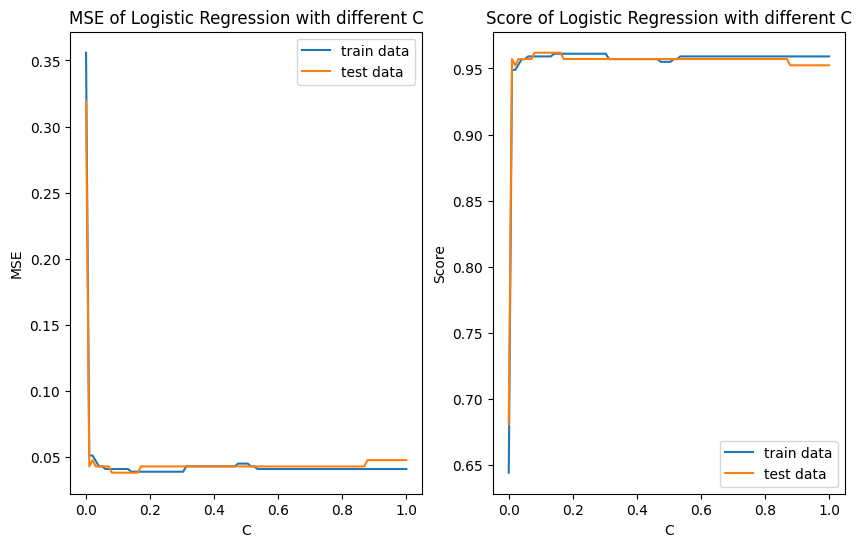

In [139]:
C_list = np.linspace(0.0001, 1, 100, endpoint=True)
MSE_train = np.array([])
score_train = np.array([])
MSE_test = np.array([])
score_test = np.array([])


for C in C_list:
    # lasso model
    log_regr = LogisticRegression(C=C, max_iter=10000)
    log_regr.fit(std_X_train, y_train)

    y_pred_train = log_regr.predict(std_X_train)
    y_pred_test = log_regr.predict(std_X_test)

    MSE_train = np.append(MSE_train, mean_squared_error(y_train, y_pred_train))
    MSE_test  = np.append(MSE_test, mean_squared_error(y_test, y_pred_test))

    score_train = np.append(score_train, log_regr.score(std_X_train, y_train))
    score_test  = np.append(score_test,  log_regr.score(std_X_test, y_test))

fig, axes = plt.subplots(1, 2, figsize=(10, 6))
axes[0].plot(C_list, MSE_train, label='train data')
axes[0].plot(C_list, MSE_test, label='test data')
axes[0].set_title('MSE of Logistic Regression with different C')
axes[0].set_xlabel('C')
axes[0].set_ylabel('MSE')
axes[0].legend()

axes[1].plot(C_list, score_train, label='train data')
axes[1].plot(C_list, score_test, label='test data')
axes[1].set_title('Score of Logistic Regression with different C')
axes[1].set_xlabel('C')
axes[1].set_ylabel('Score')
axes[1].legend()

plt.show()